In [1]:
import pandas as pd
import numpy as np

import os
import json

from scipy import stats
from matplotlib import pyplot as plt

import generators
import links
import utils

# How to evalate model fit?

- Does the chain converge to a stable sampling distribution?

- What is the probability that a particular model is correct?

- How does the posterior compare with the distribution of the data?
    - In expectation
    - statistical distance

- How does the posterior compare with the data-generating process?
    - In expectation
    - statistical distance



In [2]:
scenarios = pd.read_csv(os.path.join('inputs','scenarios.csv'), index_col='name')
X = pd.read_csv(os.path.join('inputs','weather.csv'), index_col='time')
y = pd.read_csv('scenarios/scenario0/failures.csv', index_col='time')

In [3]:
params = generators.params(scenarios.loc[0], fleet_size=10000, seed=0)

In [4]:
with open(os.path.join('scenarios', 'scenario0', 'chains', 'metadata copy.txt'), 'r') as f:
    meta = f.read()

# oops...
meta = json.loads('[%s]'%(meta.replace('}{', '},{')))

# Choose the model that's most likely

The problem with this approach is that my system is over parameterized. The data generating process is just a constant. Models with more parameters aren't less likely, the likelihood is about the same (obviously), but they don't provide meaningful insights. 

Looking at plots in 5.2, over parameterized models have unstable sampling distributions in the markov chain. Would it make sense to choose a model based on sampling stability, rather than likelihood?

**Scott tip:** Learn about Fisher Information
https://en.wikipedia.org/wiki/Fisher_information

In [18]:
likelihoods = {}
for entry in meta:
    model_name = entry.keys()[0]
    model = entry[model_name]
    
    print model_name
    
    param_list = model['variables']
    mcmc_params = pd.read_csv(os.path.join('scenarios', 'scenario0', 'chains', '%s.csv'%(model_name)), index_col=0)
    mcmc_params = mcmc_params[param_list]
    
    logL = pd.Series()
    for i in np.arange(5000,len(mcmc_params), 100):
        logL.loc[i] = utils.calc_likelihood(mcmc_params.loc[i], X, y['count'], links.Link())
    likelihoods[model_name] = logL

constant
constant+Wind
constant+Wind+Temp


In [21]:
pd.DataFrame(likelihoods).mean().sort_values()


constant+Wind        -1579.439840
constant             -1579.414432
constant+Wind+Temp   -1579.395011
dtype: float64

-1578.1620113271558

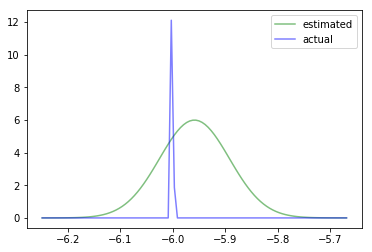

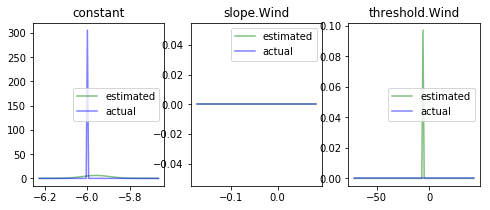

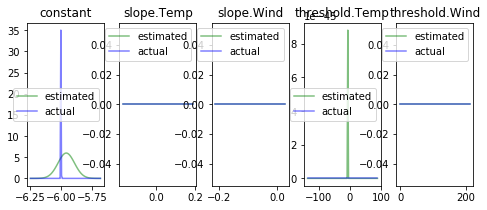

In [111]:
y = pd.read_csv('scenarios/scenario0/failures.csv', index_col='time')

for entry in meta:
    model_name = entry.keys()[0]
    model = entry[model_name]
    
    param_list = model['variables']
    mcmc_params = pd.read_csv(os.path.join('scenarios', 'scenario0', 'chains', '%s.csv'%(model_name)), index_col=0)
        
    if len(param_list) == 1:
        p = param_list[0]

        fig, ax = plt.subplots()
        bins = np.linspace(mcmc_params[p].loc[1000:].min(), mcmc_params[p].loc[1000:].max(), 100)
        
        estimated = stats.norm.fit(mcmc_params[p].loc[1000:].tolist())
        actual = stats.norm.fit(params[p].tolist())

        ax.plot(bins, stats.norm.pdf(bins, *estimated), color='g', alpha=0.5, label='estimated')
        ax.plot(bins, stats.norm.pdf(bins, *actual), color='b', alpha=0.5, label='actual')
        
        ax.legend()

    else:
        fig, ax = plt.subplots(figsize=(8,3), ncols=len(param_list))
    
        for i, p in enumerate(param_list):
            bins = np.linspace(mcmc_params[p].loc[1000:].min(), mcmc_params[p].loc[1000:].max(), 100)

            ax[i].plot(bins, stats.norm.pdf(bins, *estimated), color='g', alpha=0.5, label='estimated')
            ax[i].plot(bins, stats.norm.pdf(bins, *actual), color='b', alpha=0.5, label='actual')
            ax[i].set_title(p)
            
            ax[i].legend()
    plt.show()

In [102]:
np.log(failures.mean())

count   -3.840446
rate    -3.789622
dtype: float64

KeyboardInterrupt: 

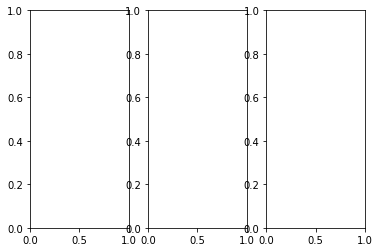

In [27]:
fig, ax = plt.subplots(ncols=len(X.keys()))

for i, key in enumerate(X.keys()):
    x_vals = np.linspace(X[key].min(), X[key].max(), 100)
    x_in = X.mean()*pd.DataFrame(1, columns=X.keys(), index=range(len(x_vals)))
    x_in[key] = x_vals
            
    rates = pd.DataFrame(index=_params.index, columns=x_vals)
    for j in params.index:
        rates.loc[j] = links.Link().failure_rate(_params.loc[j], x_in)
        
    for key in rates.keys():
        ax[i].plot(key*np.ones(len(rates),), rates[key].tolist(), ls=' ', marker='.', color='g', alpha=0.1)
plt.show()

In [26]:
x_in = X.mean()*pd.DataFrame(1, columns=X.keys(), index=range(100))


In [23]:
x_in.head()

,Wind,Precip,Temp
0,6.286487,0.001303,58.068202
1,6.286487,0.001303,58.068202
2,6.286487,0.001303,58.068202
3,6.286487,0.001303,58.068202
4,6.286487,0.001303,58.068202
